<a href="https://colab.research.google.com/github/teegwende/WQPandEntitiesDensity/blob/main/ModelTestPanamassoV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


1.0 ou 30.0 Tapez bonne valeur30
1-Modèle Auto  2-Modèle Non Auto1
1-Persistence  2-Extinction1
1-Saturation  2-Masse d'action2
1-Hivernage 2-Froide 3-Chaude2
lamdaH 0.28405568611111115
d_H 4.8990789731530466e-05
B vaut 0.06933333333333333


<Figure size 1440x1080 with 0 Axes>

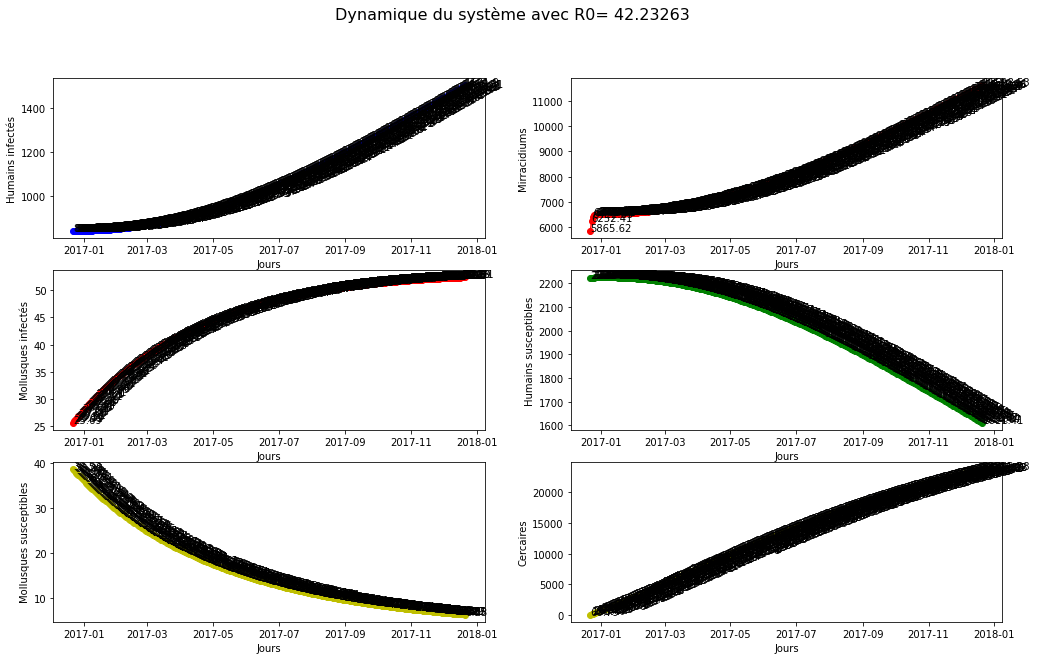

In [ ]:
import math
import numpy as np
import pandas as pd
#!/usr/bin/env python3
# -*- coding: utf-8 -*- 
"""
Created on Wed Jul 29 13:05:18 2020

@author: teegwende
"""
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime, timedelta
import os

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

from scipy.integrate import odeint,solve_ivp
#Création du dossier des graphes
now = datetime.now()
# directory=str('/gdrive/MyDrive/traitement_mathematique/ResutlSimulation' +str( now.strftime(("%d_%b_%Y_%H_%M")) ) )
directory=str('/gdrive/MyDrive/traitement_mathematique/ResutlSimulation' )  

if not os.path.exists(directory):
    os.mkdir(directory)

np.seterr(invalid='ignore')

def model(t,y):
    Hs,Hi,K,Ms,Mi,P = y
    dHsdt = lamda_H - (beta_H*Hs*P)/(1+(a*Hs)) - (d_H*Hs) + (sigma*Hi)
    dHidt = (beta_H*Hs*P)/(1+(a*Hs)) - (d_H+sigma)*Hi
    dKdt = (alpha1*Hi) - (mu_K*K)
    dMsdt = B - (beta_M*Ms*K)/(1+(b*Ms)) - (mu*Ms)
    dMidt = (beta_M*Ms*K)/(1+(b*Ms)) - (mu*Mi)
    dPdt = (alpha2*Mi) - (mu_P*P)
    
    dydt = np.array([dHsdt,dHidt,dKdt,dMsdt,dMidt,dPdt])

    return dydt

def modelNonAuto(t,y):    
    Hs,Hi,K,Ms,Mi,P = y
    #Notation petit et grand H pour signifier qu'on fait la copie de la valeur du paramètre
    #pour ensuite continuer dans l'appel de la fonction
    #De même on a ajouté les tirets du 8 pour différencier les autres variables
    beta_h= beta_H *(1+2.5*math.sin(math.pi*(t/6) + 4.5 ) )
    beta_m=beta_M*(1+2.5*math.sin(math.pi*(t/6) + 4.5 ) )
    delta_v=B*(1+0.1* math.sin(math.pi*(t/6) )) #B pour valeur initial
    mu_=mu*(1+0.1* math.sin(math.pi*(t/6) ))
    mu_P_=mu_P*(1+0.1* math.sin(math.pi*(t/6) ))
    mu_K_=mu_K*(1+0.1* math.sin(math.pi*(t/6) ))
    alpha1_=alpha1*(1+0.1* math.sin(math.pi*(t/6) ))
    alpha2_=alpha2*(1+0.1* math.sin(math.pi*(t/6) ))

    dHsdt = lamda_H - (beta_h*Hs*P)/(1+(a*Hs)) - (d_H*Hs) + (sigma*Hi)
    dHidt = (beta_h*Hs*P)/(1+(a*Hs)) - (d_H+sigma)*Hi
    dKdt = (alpha1_*Hi) - (mu_K_*K)
    dMsdt = delta_v - (beta_m*Ms*K)/(1+(b*Ms)) - (mu_*Ms)
    dMidt = (beta_m*Ms*K)/(1+(b*Ms)) - (mu_*Mi)
    dPdt = (alpha2_*Mi) - (mu_P_*P)

    dydt = np.array([dHsdt,dHidt,dKdt,dMsdt,dMidt,dPdt])

    return dydt

def deductionpopSnails(saison):
    
  HS0=3065.0 
  Hi0=(HS0*0.2747)
  HS0=HS0-Hi0

  if saison==1:   #Hivernage
    MS0=6.94
    Mi0=(MS0*18.49)/100
    MS0=MS0-Mi0
    depart="2016-11-01"
  
  if saison==2:   #Froide
    MS0=64.22
    Mi0=(MS0*40)/100
    MS0=MS0-Mi0
    # depart="2016-12-01"
    depart="2016-12-22"


  if saison==3:  #Chaude
    MS0=187.66
    Mi0=(MS0*50.18)/100
    MS0=MS0-Mi0
    depart="2017-03-01"

  return HS0,Hi0,MS0,Mi0,depart

#params du systeme

dt=float(input("1.0 ou 30.0 Tapez bonne valeur"))
nomModel=int(input("1-Modèle Auto  2-Modèle Non Auto"))
persistence=int(input("1-Persistence  2-Extinction"))
incidence=int(input("1-Saturation  2-Masse d'action"))

listeecarts=[]
listindex=[]



#lamda_H=80000.0/dt #se clacule en prenant (HS0*taux de natalité moyen annuel/1000)/12

if persistence==1:
    beta_H=(0.000027/12)/dt #tiré de Zheng
    # beta_H = 4e-12/dt #un peu inconnu # tiré des docs de traoré et de Li
    sigma = 0/dt
    beta_M = (0.0004/12)/dt #un peu inconnu  #Tiré de Feng
    # beta_M = 2e-7 #un peu inconnu
    title="Persistence"

if persistence==2:
    beta_H=(0.000027/12)/dt #tiré de Zheng
    sigma = 1/dt
    beta_M = (0.0004/12)/dt #un peu inconnu  #Tiré de Feng
    title="Extinction"
    # beta_H = 4e-12/dt #un peu inconnu
    # sigma = 1/dt
    # beta_M = 2e-7/dt #un peu inconnu
    # title="Extinction"

esperancevie=56.7 #Exprimé en nombre d'années
tauxNatalite=46  #Exprimé en N/1000


saison=int(input("1-Hivernage 2-Froide 3-Chaude"))
Hs0,Hi0,Ms0,Mi0,depart=deductionpopSnails(saison)

###On force le Mi0
# Ms0=Ms0+Mi0
# Mi0=0

alpha1 = 209.0/dt #variable invariante Commun à LI et chiyaka
# alpha1 = 0.0/dt #variable invariante Commun à LI et chiyaka. Mis ici pour tester le scénario 4

K0 = Hi0 * alpha1

alpha2 = 78.0/dt #variable invariante Commun à LI et chiyaka et Feng
# alpha2 = 0/dt #variable invariante Commun à LI et chiyaka et Feng. Mis ici pour tester le scénario 3

# mu_P = 0.2/dt  #variable invariante
mu_P = 0.12/dt  #variable invariante
P0 = Mi0*alpha2
P0= P0 #-mu_P*P0

#******* Les paramètres *******

lamda_H=( (Hs0*46*1e-3) /12) /dt #se clacule en prenant (HS0*taux de natalité moyen annuel/1000)/12
print("lamdaH",lamda_H)
d_H = (1/(esperancevie*12))/dt  #Formule de calcul = 1/espérance de vie X 12
print("d_H",d_H)
mu_K = 27.0/dt #variable invariante


B=2.08/dt                      #Formule de calcul = (pop ini snails X taux de natalité annuel)/12 
                                    #Les 25/12 viennent du papier de Zheng. 25 c'est annuel. Je divise par 12 pour avoir la valeur mensuelle
                                    #Aussi ce n'est pas la première formule qui est utilisée puisque nous n'avons pas le taux de natalité. Voir PODA pour ça
                                    #Une remarque est que les 25/12 correspondent un peu au 0.06/jour de Allen

print("B vaut",B)
# mu = 0.01788/dt #variable invariante
mu = 0.5/12/dt #variable invariante. Tiré de Feng


if incidence == 1:
    a=5e-8/dt
    b=5e-8/dt
if incidence == 2:
    a=0.0/dt
    b=0.0/dt
y0=[Hs0,Hi0,K0,Ms0,Mi0,P0]
nomCompartiments=["Humains susceptibles","Humains infectés","Mirracidiums",
                  "Mollusques susceptibles","Mollusques infectés","Cercaires"]
#Calcul du R0 du modèle autonome
P=(alpha1*alpha2)/(mu_P*mu_K*mu*(sigma+d_H))
M=lamda_H/d_H
N=B/mu
I=beta_H*N/(1+(b*N))
W=beta_M*M/(1+(a*M))
R0=math.sqrt(P*I*W)


#Fin du calcul de R0"""

periodmois=pd.date_range(depart,periods=12,freq='M')
periodjours=pd.date_range(depart,periods=365,freq='D')

if dt==30.0:
    period=365
    xlabel='Jours'
    periodgraph=periodjours
if dt==1.0:
    period=12
    xlabel='Mois' 
    periodgraph=periodmois

if nomModel==1:
    modelname="model"
    sol2=solve_ivp(model,[0,period],y0,t_eval=np.arange(0,period,1), method='RK45')
if nomModel==2:
    modelname="modelNonAuto"
    sol2=solve_ivp(modelNonAuto,[0,period],y0,t_eval=np.arange(0,period,1), method='RK45')

df=pd.DataFrame(np.transpose(sol2.y),columns=[nomCompartiments[0],nomCompartiments[1],nomCompartiments[2],nomCompartiments[3]
                             ,nomCompartiments[4],nomCompartiments[5]])
df["deltaT"]=sol2.t
df["period"]=periodgraph

df.to_csv(directory+'/RO_'+str(round(R0,2))+'.csv')

if persistence==1:
  df.to_csv(directory+'/predictions.csv')
if persistence==2:
  df.to_csv(directory+'/predictionsExtinc.csv')


# affichage de la courbe des résultats des humains susceptibles
plt.figure(figsize=(20,15))
fig,axes=plt.subplots(3,2,figsize=(17,10))
#plt.grid(True)
#plt.xlim(0,n)
#plt.title("R0= "+str(round(R0,2)),loc='right')
fig.suptitle("Dynamique du système avec R0= "+str(round(R0,5)),fontsize=16)
axes[0,0].plot(periodgraph,sol2.y[1,:],'b',label=nomCompartiments[1],marker='o')
for v,p in zip(sol2.y[1,:],periodgraph):
    axes[0,0].annotate(round(v,2),xy=(p,v),fontsize=10)
    
axes[0,0].set_xlabel(xlabel)
axes[0,0].set_ylabel(nomCompartiments[1])
#axes[0,0].xaxis.set_major_locator(mdates.MonthLocator(3))
axes[0,0].xaxis.set_major_formatter(DateFormatter("%Y-%m"))
#plt.xticks(rotation=45, ha='right',fontsize=12)

#axes[0,0].set_ylim(0,max(sol2.y[1,:]))

axes[0,1].plot(periodgraph,sol2.y[2,:],'r',label=nomCompartiments[2],marker='o')
for v,p in zip(sol2.y[2,:],periodgraph):
    axes[0,1].annotate(round(v,2),xy=(p,v),fontsize=10)
axes[0,1].set_xlabel(xlabel)
axes[0,1].set_ylabel(nomCompartiments[2])

axes[1,0].plot(periodgraph,sol2.y[4,:],'r',label=nomCompartiments[4],marker='o')
for v,p in zip(sol2.y[4,:],periodgraph):
    axes[1,0].annotate(round(v,2),xy=(p,v),fontsize=10)
axes[1,0].set_xlabel(xlabel)
axes[1,0].set_ylabel(nomCompartiments[4])


axes[1,1].plot(periodgraph,sol2.y[0,:],'g',label=nomCompartiments[0],marker='o')
for v,p in zip(sol2.y[0,:],periodgraph):
    axes[1,1].annotate(round(v,2),xy=(p,v),fontsize=10)
axes[1,1].set_xlabel(xlabel)
axes[1,1].set_ylabel(nomCompartiments[0])

axes[2,0].plot(periodgraph,sol2.y[3,:],'y',label=nomCompartiments[3],marker='o')
for v,p in zip(sol2.y[3,:],periodgraph):
    axes[2,0].annotate(round(v,2),xy=(p,v),fontsize=10)
axes[2,0].set_xlabel(xlabel)
axes[2,0].set_ylabel(nomCompartiments[3])
# axes[2,0].xaxis.set_major_locator(mdates.MonthLocator(3))
# axes[2,0].xaxis.set_major_formatter(DateFormatter("%Y-%m"))
# plt.xticks(rotation=45, ha='right',fontsize=18)

axes[2,1].plot(periodgraph,sol2.y[5,:],'y',label=nomCompartiments[5],marker='o')
for v,p in zip(sol2.y[5,:],periodgraph):
    axes[2,1].annotate(round(v,2),xy=(p,v),fontsize=10)
axes[2,1].set_xlabel(xlabel)
axes[2,1].set_ylabel(nomCompartiments[5])
# axes[2,1].xaxis.set_major_locator(mdates.MonthLocator(3))
# axes[2,1].xaxis.set_major_formatter(DateFormatter("%Y-%m"))
# plt.xticks(rotation=45, ha='right',fontsize=12)
# plt.xticks(rotation=45, ha='right',fontsize=12)

#plt.legend()
plt.savefig(directory+'/'+modelname+'_graphes_B'+str(B)+'R0_'+str(round(R0,3))+'.pdf')
plt.show()
plt.close()